In [15]:
import glob
import numpy as np
from astropy.io import fits
import pandas as pd
from astropy.stats import LombScargle

import sys
terminalpythonpath=['', '/home/szabopal/PycharmProjects/venv36/lib/python36.zip', '/home/szabopal/PycharmProjects/venv36/lib/python3.6', '/home/szabopal/PycharmProjects/venv36/lib/python3.6/lib-dynload', '/usr/lib/python3.6', '/home/szabopal/PycharmProjects/venv36/lib/python3.6/site-packages']
[sys.path.append(each) for each in terminalpythonpath]
import matplotlib.pyplot as plt

In [16]:
def massAAPreader(ID, campaign):
    
    try:

        #lcfile=glob.glob('../../GO*/*'+target.split('/')[-1].split('_')[0][4:]+'*k2sc.lc');
        lcfile=glob.glob('../../GO*/ktwo'+str(ID)+'-c'+campaign+'_lpd-targ.fits_massAAP_lc_TH8_k2sc.lc')[0]

       # if len(lcfile)==0:
       #     massAAP_k2sc_corr_flux = massAAP(each,True)
       #     lcfile=glob.glob('../../GO*/*'+target.split('/')[-1].split('_')[0][4:]+'*k2sc.lc')

        #print(lcfile)
        lc=np.genfromtxt(lcfile,delimiter=' ',skip_header=1)
        massAAPreader.lc=lc
        bjd=lc[:,0]
        flux=lc[:,1]

        
        return bjd, flux
    
    except IndexError:
        
        return False, False

In [17]:
GO6082targets=glob.glob('../../GO6082/*c06*lpd*targ.fits')
GO8037targets=glob.glob('../../GO8037/*c08*lpd*targ.fits')
GO10037_1_targets=glob.glob('../../GO10037/*c101*lpd*targ.fits')
GO10037_2_targets=glob.glob('../../GO10037/*c102*lpd*targ.fits')
GO12111targets=glob.glob('../../GO12111/*c12*lpd*targ.fits')
GO13111targets=glob.glob('../../GO13111/*c13*lpd*targ.fits')
GO14058targets=glob.glob('../../GO14058/*c14*lpd*targ.fits')
GO15058targets=glob.glob('../../GO15058/*c15*lpd*targ.fits')
GO16058targets=glob.glob('../../GO16058/*c16*lpd*targ.fits')
GO17033targets=glob.glob('../../GO17033/*c17*lpd*targ.fits')
GO18033targets=glob.glob('../../GO18033/*c18*lpd*targ.fits')

In [18]:
targetlist=(
GO6082targets+
GO8037targets+
#GO10037_1_targets+
GO10037_2_targets+
GO12111targets+
GO13111targets+
GO14058targets+
GO15058targets+
GO16058targets+
GO17033targets+
GO18033targets)

In [19]:
df=pd.read_csv('kp_mag_search.csv')

class star:
    def __init__(self, ID, campaign):
        
        self.ID=ID
        self.campaign=campaign
        self.massaapbjd, self.massaapflux = massAAPreader(self.ID, self.campaign)


In [20]:
for index, each in enumerate(targetlist):
    
    if index==0:

        ID=each.split('/')[-1].split('-')[0][4:]
        campaign=each.split('/')[-1].split('-')[1].split('_')[0][1:]

        ourstar=star(ID,campaign)

In [103]:
ourstar.massaapbjd

array([2384.46326347, 2384.48369574, 2384.50412811, ..., 2463.33010978,
       2463.35054164, 2463.3709735 ])

In [104]:
frequency, power = LombScargle(ourstar.massaapbjd, ourstar.massaapflux).autopower(
    normalization='psd',nyquist_factor=1.2)
frequency[power==max(power)]

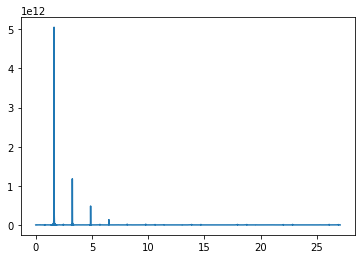

In [105]:
plt.plot(frequency,power)

In [106]:
frequency[power==max(power)]

array([1.62595011])

In [107]:
#ampli = (power * (frequency[1]-frequency[0]))**0.5

In [108]:
ampli = (power * (max(frequency)-min(frequency))/len(frequency))**0.5

In [109]:
sinfit = (ampli[ampli==max(ampli)])*np.sin(ourstar.massaapbjd*2*np.pi*frequency[ampli==max(ampli)])

(2400, 2410)

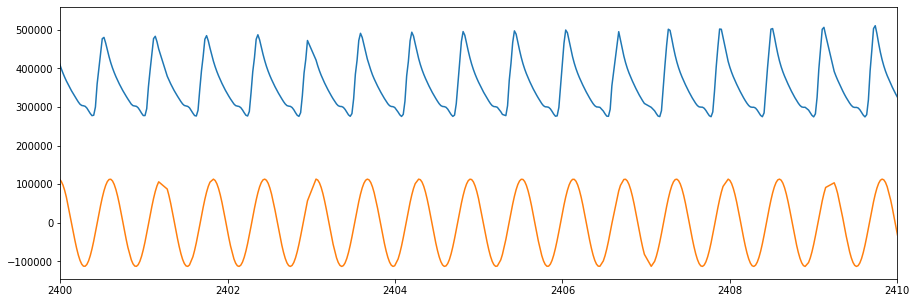

In [117]:
plt.figure(figsize=(15,5))
plt.plot(ourstar.massaapbjd,ourstar.massaapflux)
plt.plot(ourstar.massaapbjd,sinfit)
plt.xlim([2400,2410])

In [118]:
sinfit

array([ 12990.80524979,  36003.79197567,  57453.80838977, ...,
       113153.45370596, 110421.98488921, 102896.84674453])

In [121]:
!pip3 install scipy

     |████████████████████████████████| 25.2MB 2.4MB/s eta 0:00:01


In [161]:
from scipy.optimize import curve_fit

In [204]:
def func(t, offset, ampli, phase):
    
    frequency, power = LombScargle(ourstar.massaapbjd, ourstar.massaapflux).autopower(
        normalization='psd',nyquist_factor=1.2)
    
    mainfrequency = frequency[power==max(power)]
    print('hw')
    print(frequency)
    return offset + ampli * np.sin(mainfrequency*2*np.pi*t - phase)

In [205]:
popt, pcov = curve_fit(func, ourstar.massaapbjd, ourstar.massaapflux)

hw
[1.26730328e-03 3.80190985e-03 6.33651642e-03 ... 2.70708654e+01
 2.70734000e+01 2.70759346e+01]
hw
[1.26730328e-03 3.80190985e-03 6.33651642e-03 ... 2.70708654e+01
 2.70734000e+01 2.70759346e+01]
hw
[1.26730328e-03 3.80190985e-03 6.33651642e-03 ... 2.70708654e+01
 2.70734000e+01 2.70759346e+01]
hw
[1.26730328e-03 3.80190985e-03 6.33651642e-03 ... 2.70708654e+01
 2.70734000e+01 2.70759346e+01]
hw
[1.26730328e-03 3.80190985e-03 6.33651642e-03 ... 2.70708654e+01
 2.70734000e+01 2.70759346e+01]
hw
[1.26730328e-03 3.80190985e-03 6.33651642e-03 ... 2.70708654e+01
 2.70734000e+01 2.70759346e+01]
hw
[1.26730328e-03 3.80190985e-03 6.33651642e-03 ... 2.70708654e+01
 2.70734000e+01 2.70759346e+01]
hw
[1.26730328e-03 3.80190985e-03 6.33651642e-03 ... 2.70708654e+01
 2.70734000e+01 2.70759346e+01]
hw
[1.26730328e-03 3.80190985e-03 6.33651642e-03 ... 2.70708654e+01
 2.70734000e+01 2.70759346e+01]
hw
[1.26730328e-03 3.80190985e-03 6.33651642e-03 ... 2.70708654e+01
 2.70734000e+01 2.70759346e+01]


In [206]:
popt

array([ 3.58457508e+05, -7.53988049e+04, -1.59924941e+01])

In [207]:
pcov

array([[ 3.22137379e+05, -1.22535663e+03, -2.53643293e-02],
       [-1.22535663e+03,  6.45337349e+05,  4.26001579e-02],
       [-2.53643293e-02,  4.26001579e-02,  1.13143450e-04]])

In [208]:
sinfit = func(ourstar.massaapbjd, popt[0], popt[1], popt[2], popt[3])

IndexError: index 3 is out of bounds for axis 0 with size 3

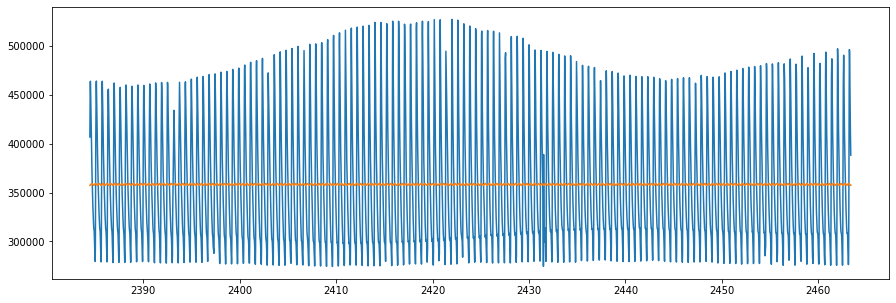

In [212]:
plt.figure(figsize=(15,5))
plt.plot(ourstar.massaapbjd,ourstar.massaapflux)
plt.plot(ourstar.massaapbjd, sinfit)

(2390, 2395)

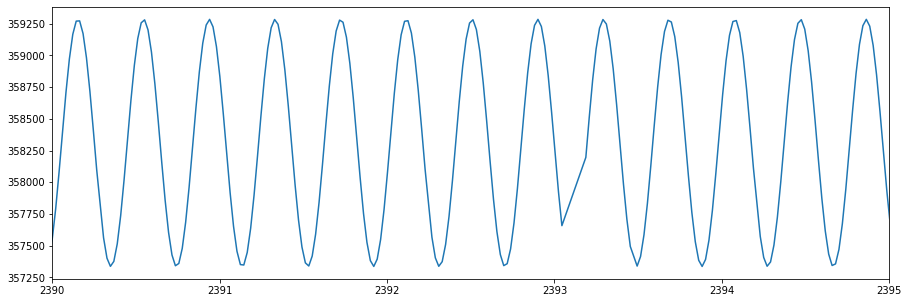

In [215]:
plt.figure(figsize=(15,5))
plt.plot(ourstar.massaapbjd, sinfit)
plt.xlim([2390,2395])

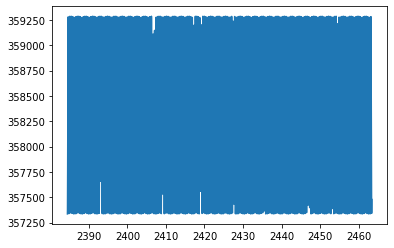

In [210]:
plt.plot(ourstar.massaapbjd,sinfit)

In [160]:
sinfit

array([357913.41354658, 357913.62341507, 357913.83328458, ...,
       358723.5278753 , 358723.73775948, 358723.94764366])

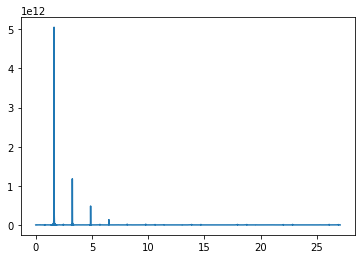

In [231]:
from astropy.stats import LombScargle
ls = LombScargle(ourstar.massaapbjd, ourstar.massaapflux, nterms=1)
freq, power = ls.autopower(normalization='psd',nyquist_factor=1.2)
plt.plot(freq, power);

In [232]:
best_freq = freq[power.argmax()]
signalfit = ls.model(ourstar.massaapbjd, best_freq)

(2440, 2450)

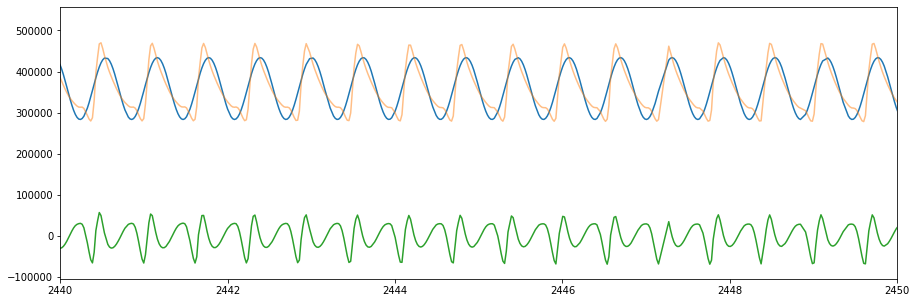

In [236]:
plt.figure(figsize=(15,5))
plt.plot(ourstar.massaapbjd, signalfit)
plt.plot(ourstar.massaapbjd,ourstar.massaapflux,alpha=0.5)
plt.plot(ourstar.massaapbjd, ourstar.massaapflux-signalfit)
plt.xlim([2440,2450])

In [276]:
def whitening(towhiten):

    ls = LombScargle(ourstar.massaapbjd, towhiten, nterms=1)

    nyquist = len(ourstar.massaapbjd)/(2*(max(ourstar.massaapbjd)-min(ourstar.massaapbjd)))

    freq, power = ls.autopower(normalization='psd',nyquist_factor=1)
    plt.plot(freq, power);
    best_freq = freq[power.argmax()]
    signalfit = ls.model(ourstar.massaapbjd, best_freq)

    plt.figure(figsize=(15,5))
    plt.plot(ourstar.massaapbjd, signalfit)
    plt.plot(ourstar.massaapbjd,ourstar.massaapflux,alpha=0.5)
    plt.plot(ourstar.massaapbjd, ourstar.massaapflux-signalfit)
    plt.xlim([2440,2450])
    plt.show()
    return freq, power, signalfit

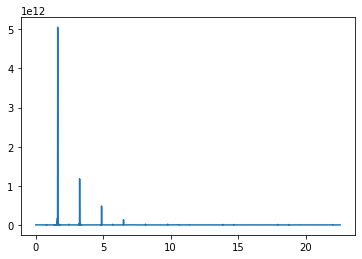

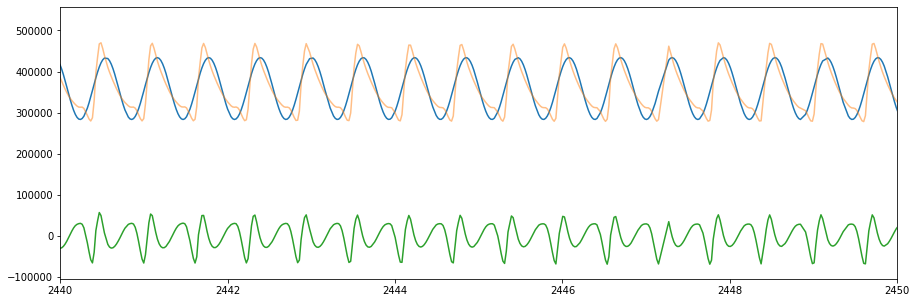

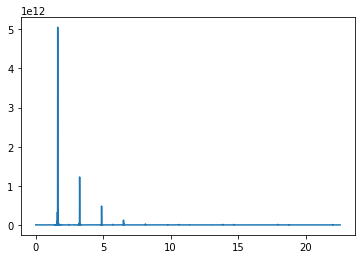

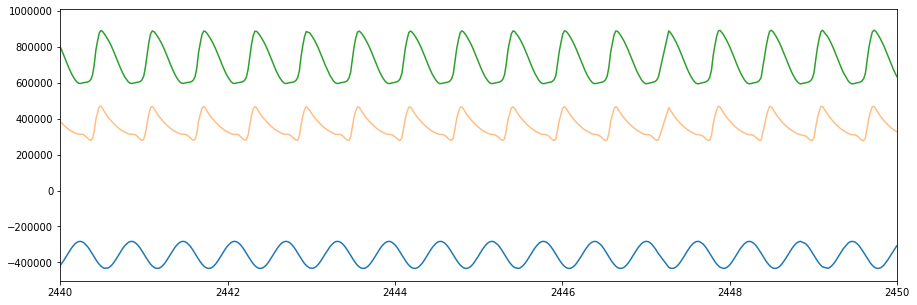

100176674816.27344
5052724401470.202


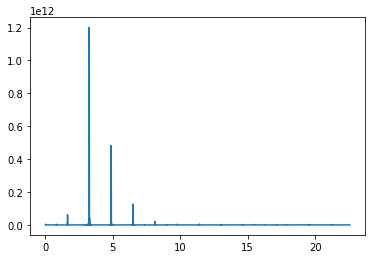

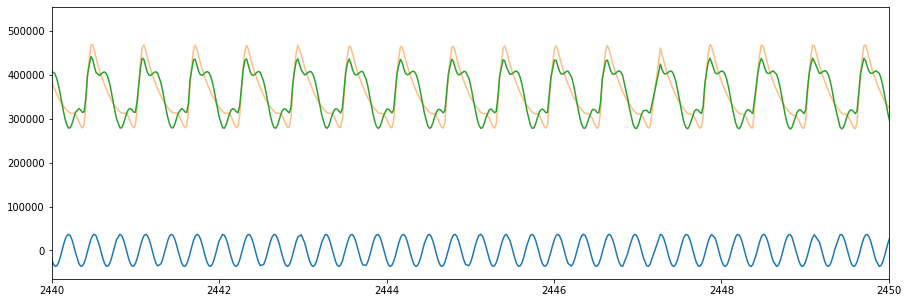

26231594550.43216
1201800849902.019


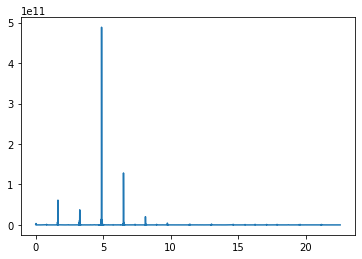

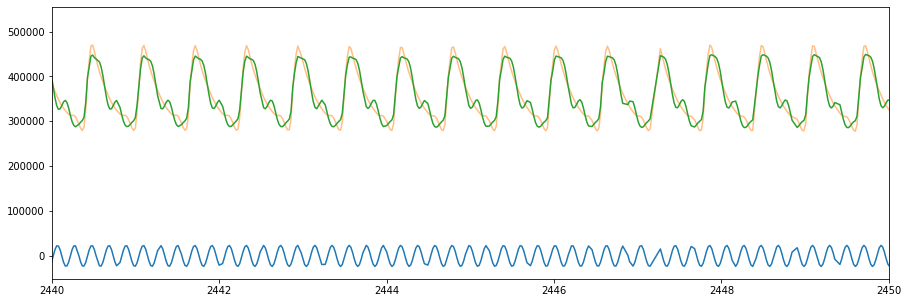

10178178328.523647
488421689506.5619


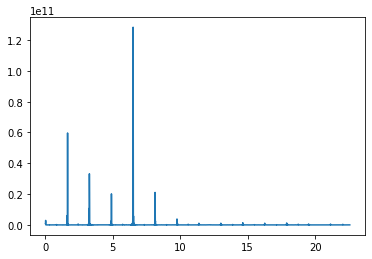

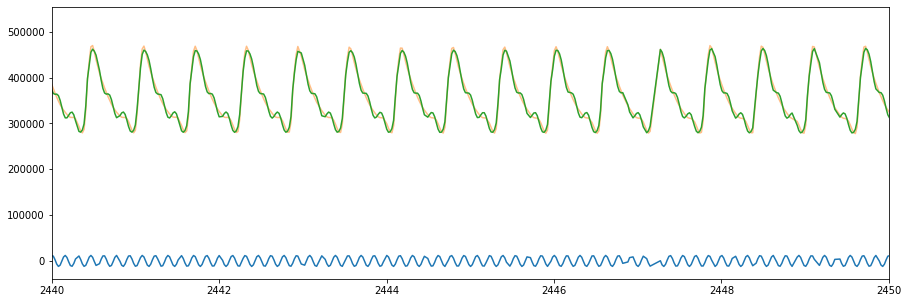

3107472727.2874837
128315856658.37247


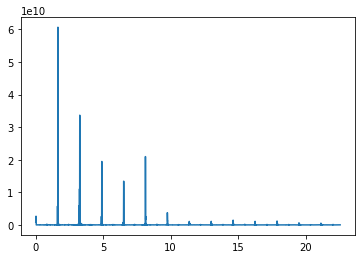

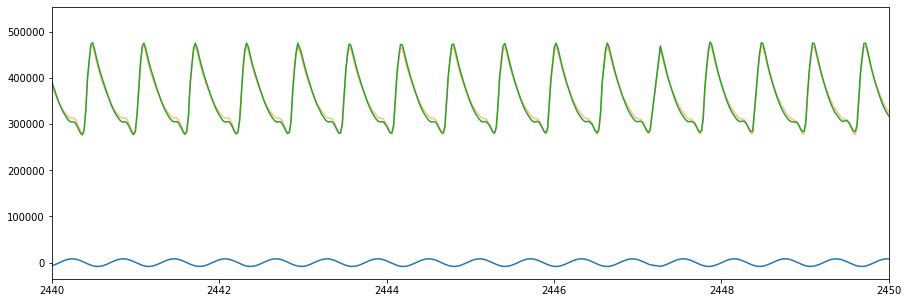

1632864063.4018207
60674910651.0547


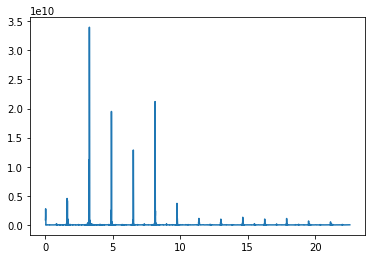

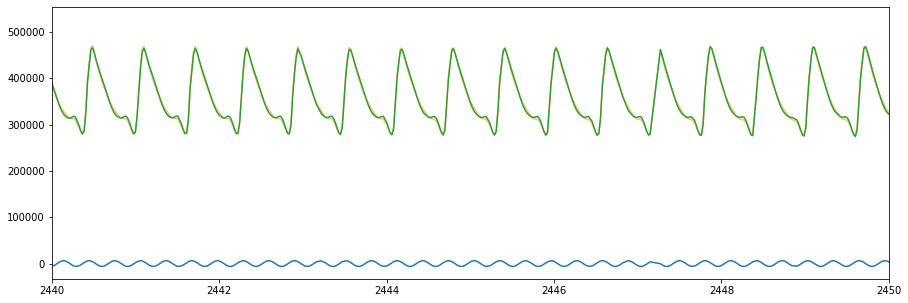

1038751182.9988581
33972621177.891575


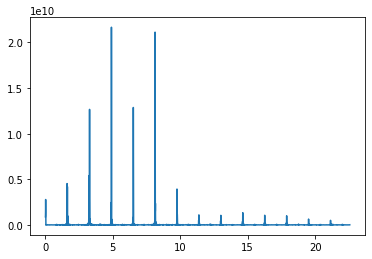

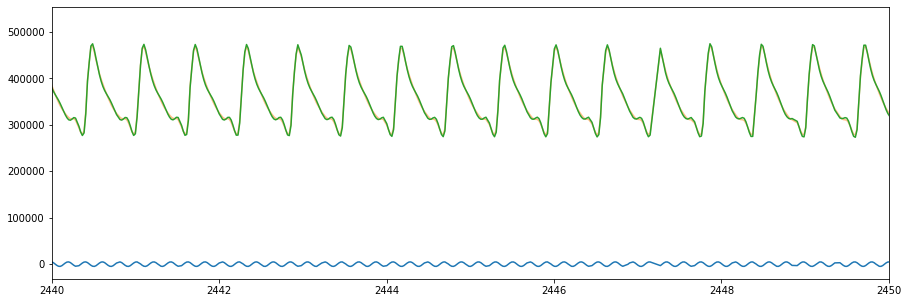

775424599.1387445
21663527884.103554


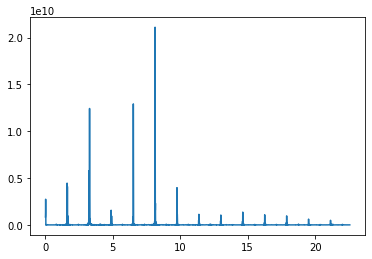

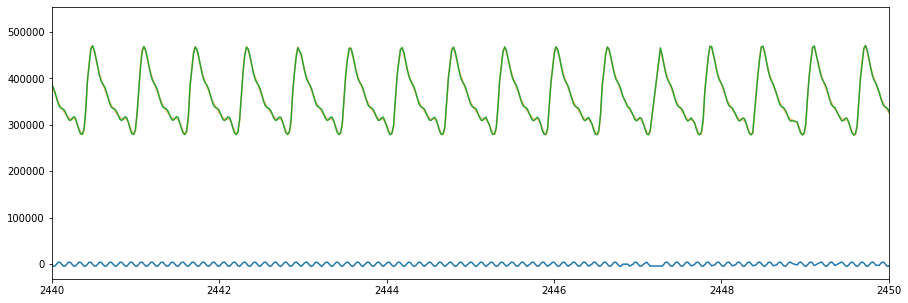

634231788.428522
21100999481.112644


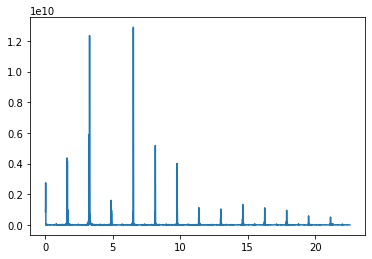

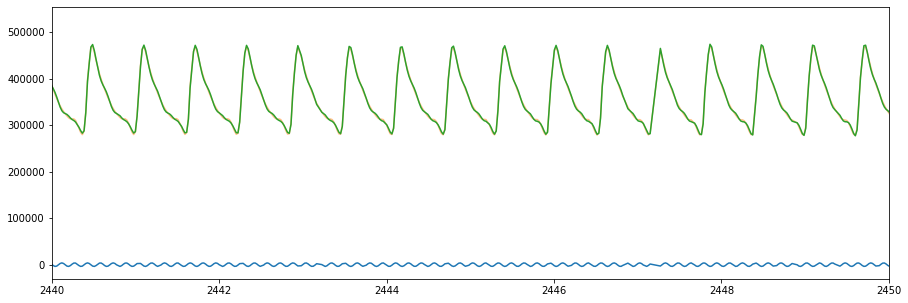

453135663.9659202
12893838086.935604


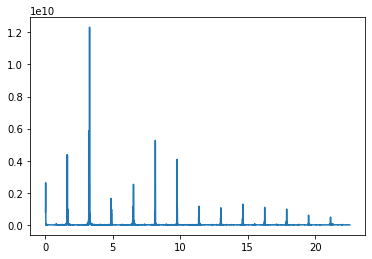

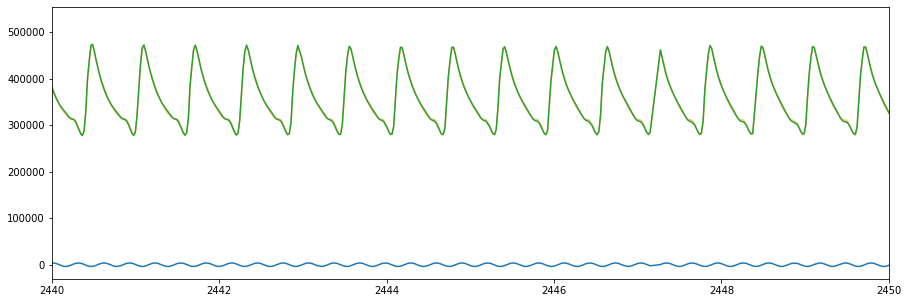

348338397.7511645
12315308644.130821


In [281]:
freq, power, signalfit = whitening(ourstar.massaapflux)
towhiten=ourstar.massaapflux-signalfit
for index in range(10):
    towhiten = towhiten - signalfit
    freq, power, signalfit = whitening(towhiten)
    print(np.std(power))
    print(np.max(power))
    


In [ ]:
freq, power, signalfit = whitening(ourstar.massaapbjd,ourstar)

In [266]:
1/((max(ourstar.massaapbjd)-min(ourstar.massaapbjd))/(2*len(ourstar.massaapbjd)))

90.25733983155645

In [270]:
nyquist

22.56433495788911